# NOTEBOOK 4

## INTRODUCTION

From EDA, to fitting models, to finding the best model in the previous notebooks, we got the best RMSE using an XGBoost Regressor model with a low value of 3.839 on the validation set. This final report is an overview of the best features in the dataset that best predicts income as well as impact on the income. Also we will predict the income for the test set.

In [1]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

# Import shap, RandomForestRegressor and XGBoost
import shap
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor

## BASIC EXPLORATORY DATA ANALYSIS

In [2]:
train = pd.read_csv('cleaned_train.csv')
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0
17011,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,1,0,22.4


In [3]:
train.index.name='row_id'
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0


In [4]:
# EDA for train data checking data shape, missing values and duplicates
print(f"Rows: {train.shape[0]}")
print(f"Columns: {train.shape[1]}")
print(f"Missing values: {train.isna().sum().sum()}")
print(f"Duplicated rows: {train.duplicated().sum()}")

Rows: 17013
Columns: 72
Missing values: 0
Duplicated rows: 0


In [5]:
# Define the features(X) and target(y) variables for the train set

X = train.drop(columns='income')
y = train['income']

# Do a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The hypeparameter tuning suggested scaling with StandardScaler for the RandomForestRegressor model and MinMaxScaler for the XGBoost Regressor model.
- So we will fit the different scalers accordingly

In [6]:
# Scale the data
# Instantiate the scaler
ss = StandardScaler()

# Fit (ON THE TRAINING DATA)
ss.fit(X_train)

# Transform (both the train and validation data)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

# MODEL FITTING AND FEATURE IMPORTANCE

## FITTING A RANDOM FOREST REGRESSOR MODEL
 RandomForest is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision on how to divide the data set into separate sets with similar responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or information gain, and for regression is **variance reduction**. 
- When training a tree, we can compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the decreased impurity from each feature can be averaged across trees to determine the final importance of the variable
- Features that are selected at the top of the trees are generally more important than features that are selected at the end nodes of the trees, as the top splits lead to bigger information gains

In [7]:
# Instantiate and fit the model
RF = RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200, random_state=0)
RF.fit(X_train_ss, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=200,
                      random_state=0)

In [8]:
# Make predictions 
y_pred_train = RF.predict(X_train_ss)
y_pred = RF.predict(X_test_ss)

# The Root Mean Squared Error for test and train set
print("Train Root Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("Test Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))
      
# The coefficient of determination: 1 is perfect prediction
print("Train Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))
print("Test Coefficient of determination: %.2f" % r2_score(y_test, y_pred))      

Train Root Mean squared error: 3.85
Test Root Mean squared error: 4.80
Train Coefficient of determination: 0.89
Test Coefficient of determination: 0.81


In [9]:
# Compute the feature importance from the model
RF.feature_importances_

array([2.97303699e-04, 6.22381699e-04, 3.32336794e-04, 9.44061518e-04,
       1.43475884e-04, 9.89981408e-04, 1.51339892e-03, 3.58879197e-03,
       3.34299273e-03, 2.56838807e-03, 2.34566806e-03, 9.59757060e-04,
       1.18279753e-03, 7.52096076e-02, 5.38075316e-04, 1.12138547e-03,
       5.84823848e-04, 4.10546730e-04, 1.00669454e-03, 2.85881093e-04,
       8.33184315e-04, 1.33573571e-02, 5.94562920e-03, 4.67858979e-03,
       3.20915321e-01, 8.54462056e-02, 6.27139309e-03, 1.06286609e-01,
       7.53255417e-03, 3.66329648e-02, 2.39722758e-02, 2.38457611e-02,
       3.83603907e-02, 8.31848684e-03, 9.35799517e-03, 1.30172996e-02,
       7.91490766e-03, 4.20856787e-03, 2.47056384e-03, 8.88210366e-03,
       1.61568380e-02, 5.81073906e-03, 2.36391431e-02, 2.05534362e-02,
       1.72872583e-04, 1.95627396e-04, 2.79094981e-03, 1.05046881e-03,
       1.91176328e-02, 3.72160360e-03, 3.90895837e-03, 2.69883626e-03,
       2.01359635e-04, 2.19522496e-02, 2.79241608e-02, 1.32244796e-04,
      

In [10]:
# Checking and Placing the feature importances in a dataframe

importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance': RF.feature_importances_
                               })

importances_df.sort_values(by='Importance', ascending=False, inplace=True, ignore_index=True)

importances_df

,Variable,Importance
0,school__degrees_awarded_predominant_recoded,0.320915
1,school__instructional_expenditure_per_fte,0.106287
2,school__faculty_salary,0.085446
3,academics__program_percentage_health,0.075210
4,student__demographics_female_share,0.038360
...,...,...
66,school__degrees_awarded_predominant_Predominan...,0.000166
67,academics__program_certificate_lt_2_yr_busines...,0.000143
68,school__degrees_awarded_predominant_Predominan...,0.000132
69,school__degrees_awarded_predominant_Predominan...,0.000099


<Figure size 720x576 with 0 Axes>

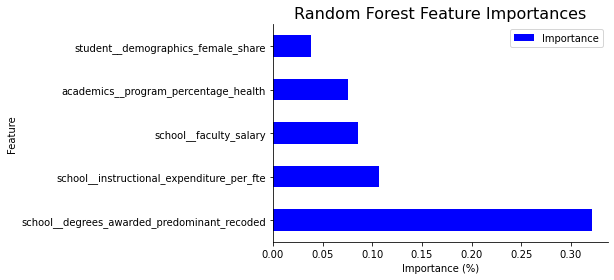

In [11]:
plt.figure(figsize=(10,8))
importances_df.head(5).set_index("Variable").plot(kind="barh", color="blue")
plt.title('Random Forest Feature Importances', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Importance (%)')
sns.despine()
plt.show()

**OBSERVATIONS**
 We can see that the top three features that impact on the income of students are 
- school__degrees_awarded_predominant_recorded
- school__institutional_expenditure_per_fte
- school__faculty_salary



## FITTING AN eXTREME GRADIENT BOOSTING( XGBOOST) REGRESSOR MODEL
**Methodology:**
- Instantiate the best model parameter gotten from the hyperparameter tuning
- Fit the model to the train set
- Evaluate model performance on the test set
- Use a SHAP explainer model to interpret the model

In [12]:
# Fit XGBoost model 
my_xgb = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=1000, random_state=0)
my_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
# Make predictions 
y_pred1_train = my_xgb.predict(X_train)
y_pred1_test = my_xgb.predict(X_test)

# The Root Mean Squared Error for train set
print("Train Root Mean squared error: %.2f" % mean_squared_error(y_train, y_pred1_train, squared=False))
print("Test Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred1_test, squared=False))
      
# The coefficient of determination: 1 is perfect prediction
print("Train Coefficient of determination: %.2f" % r2_score(y_train, y_pred1_train))
print("Test Coefficient of determination: %.2f" % r2_score(y_test, y_pred1_test))        

Train Root Mean squared error: 0.24
Test Root Mean squared error: 3.81
Train Coefficient of determination: 1.00
Test Coefficient of determination: 0.88


# MODEL INTERPRETATION USING SHAP VALUES
In order to interpret model predictions, we would use a model-agnostic method. This method, instead of describing the average behaviour of a machine learning model, will try to explain individual predictions. The model being used is SHapley Additive ExPlanations, or SHAP.

**SHAP** uses Shapley values to explain individual predictions

In [14]:
%%time 
# Interprete using Shapley values

# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(my_xgb)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train)

CPU times: total: 34min 8s
Wall time: 4min 54s


In [15]:
# Initiate Javascript for visualization 
shap.initjs()

# Plot SHAP values for row 0 
shap.force_plot(explainer.expected_value,       # Plots the average prediction on the plot
                shap_values[0],                 # Plots the Shapley values on the force plot 
                features=X_train.iloc[0],       # 'features' displays the value that is passed to it on the plot; feature value plotted for easier interpretation
                feature_names=X_train.columns)  # 'feature_names' displays the name of the features

**OBSERVATIONS:**
- The average predicted probability of income is 43.45 thousand dollars.
- Increasing effects of income such as student_demographics_dependent and school__faculty_salary is offset by decreasing effects of income such as academics__program_percentage_visual_performing

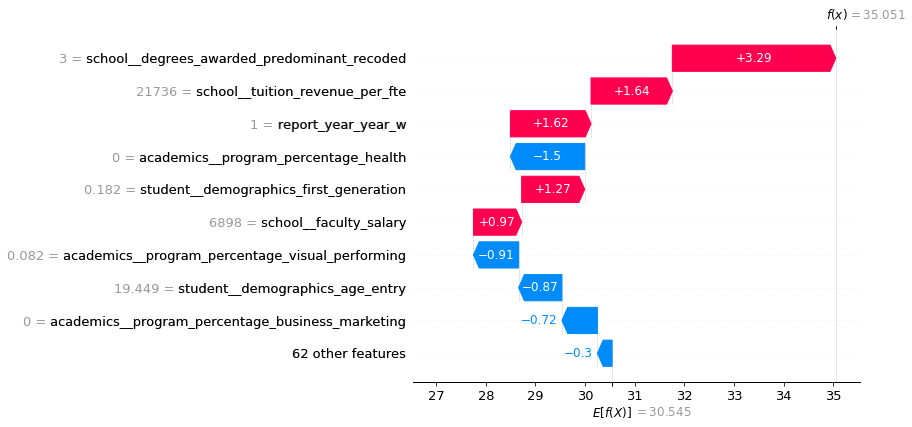

In [16]:
shap.waterfall_plot(shap.Explanation(values = shap_values[0], 
                                     base_values = explainer.expected_value, 
                                     data = X_train.iloc[0],  # added this line
                                     feature_names = X_train.columns.tolist()))

Shapley value is the average marginal contribution of a feature value across all possible coalition. The Shapley value is the feature contribution to the prediction. The magnitude of the bars represent the Shapley value for each feature, and thus how much that feature contributes to the difference between the average prediction, and the actual prediction for the data point. The larger the bar, the more that feature contributes to the prediction. The blue bars represent a negative contribution, while red bars represent a positive contribution

**OBSERVATIONS:**
- The average predicted income for this model is 43.45 thousand dollars and the predicted income for the data point selected is 30.54 thousand dollars
- We can see that **school__degrees_awarded_predominant_recorded** of 3, as well as a 13591 school__instructional_expenditure_per_fte  **increases** the income while **academics_program_percentage_visual_performing, school_demographics_age_entry** all **decrease** income predicted.

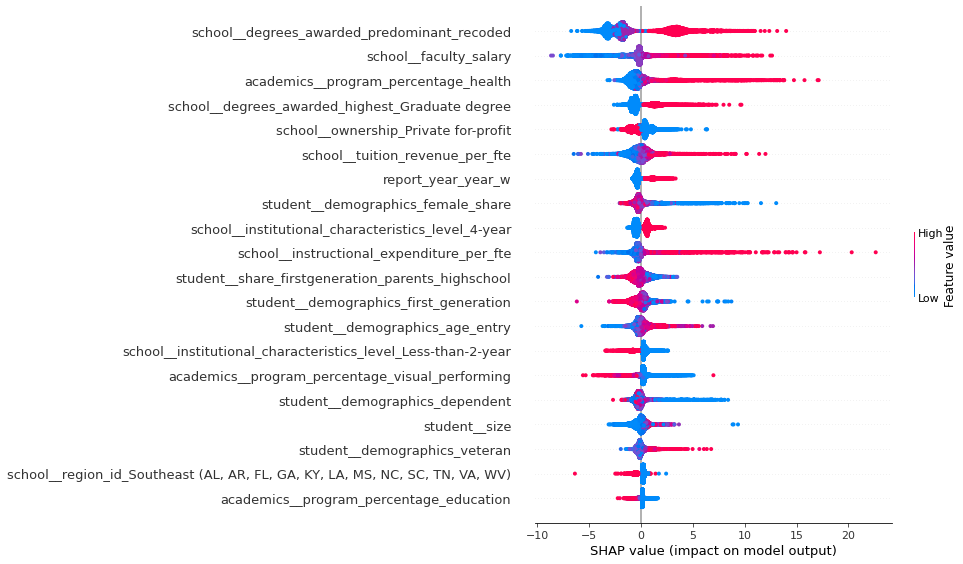

In [17]:
# Global interpretation - summary plot - type = 'dot'
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

**GLOBAL MODEL INTERPRETATION:**
- For the model, when the school__degrees_awarded_predominant_recorded, school__faculty_salary and school_instructional_expenditure_per_fte is high, it has a positive impact on the predicted income. While, when the school__degrees_awarded_predominant_recorded is low, it has a negative impact on the predicted income.
- For school__demographics_first_generation and school__demographics_dependent when the value is high, it tends to have a negative impact on the predicted Income.

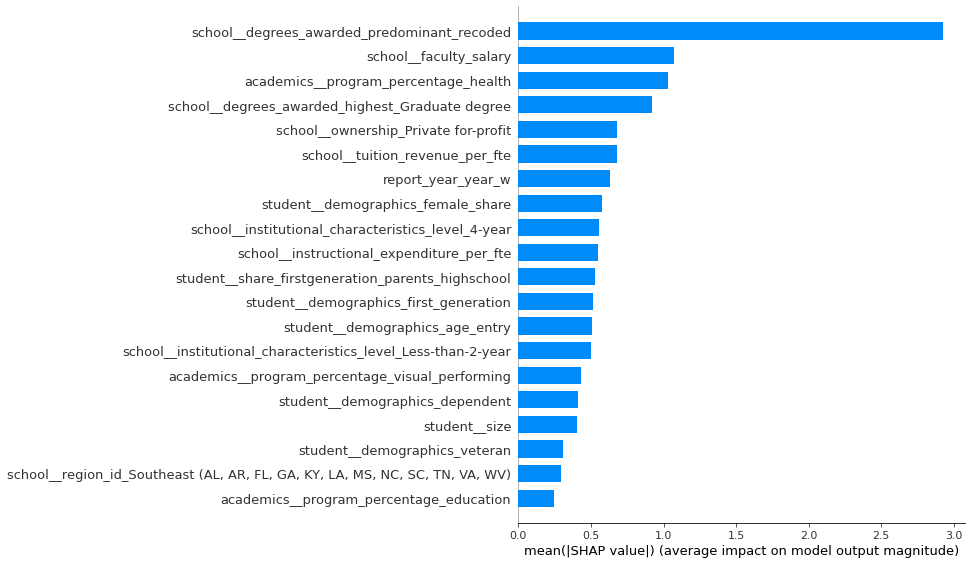

In [18]:
# Global interpretation - summary plot - type='bar'
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

- We can see that school__degrees_awarded_predominant_recorded is the most important feature of our model as it has the greatest average contribution to the prediction, followed by school__faculty_salary and school__instructional_expenditure_per_fte.

In [19]:
# Fitting on the unseen data(test data given without a target variable)
# Read in each .csv files
unseen = pd.read_csv('cleaned_test.csv')
unseen

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_New England (CT, ME, MA, NH, RI, VT)","school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099400,0.000000,0.010000,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.598959,0.866285,0.476323,0.431844,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,0.0,0.0,1.0,1.0,0.0,0.0,0.040500,0.300800,0.060500,0.012600,...,1,0,0,0,0,0,0,1,0,0
9093,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
9094,1.0,1.0,1.0,0.0,0.0,0.0,0.040700,0.160100,0.064300,0.032800,...,0,0,0,0,1,0,0,0,1,0
9095,1.0,1.0,1.0,0.0,1.0,1.0,0.048200,0.086800,0.035400,0.003200,...,0,0,0,0,0,1,0,1,0,0


In [20]:
# Setting the index name to row_id
unseen.index.name='row_id'
unseen

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_New England (CT, ME, MA, NH, RI, VT)","school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099400,0.000000,0.010000,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.598959,0.866285,0.476323,0.431844,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,0.0,0.0,1.0,1.0,0.0,0.0,0.040500,0.300800,0.060500,0.012600,...,1,0,0,0,0,0,0,1,0,0
9093,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
9094,1.0,1.0,1.0,0.0,0.0,0.0,0.040700,0.160100,0.064300,0.032800,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# Predict the income for the test set given
X_unseen = unseen
y_unseen = my_xgb.predict(X_unseen)

# Create a dataframe from the predictions
results_df = pd.DataFrame(y_unseen, columns=['income'])

# Set the index name as 'row_id'
results_df.index.name='row_id'
results_df

,income
row_id,
0,70.664230
1,78.084511
2,74.319931
3,28.510242
4,34.268131
...,...
9092,35.420521
9093,26.823093
9094,34.412670


In [36]:
# Rounding up the income values to 1 decimal place
decimals = 1    
results_df['income'] = results_df['income'].apply(lambda x: round(x, decimals))
results_df

,income
row_id,
0,70.7
1,78.1
2,74.3
3,28.5
4,34.3
...,...
9092,35.4
9093,26.8
9094,34.4


In [37]:
# Creating a csv file for the results
result_file_path = 'predicted_income.csv'
results_df.to_csv(result_file_path)

# CONCLUSION:
 Income prediction for students of different higher institutions have various factors impacting on it.
 Factors worthy of note include:
 - School degree awarded predominant whether Bachelor's, Certificate or Graduate have a great influence on income prediction
 - School ownership(public, private for profit and non profit)- this also influences the amount allocated for the school instructional expenditure per full term and school tuition revenue as well
 - academic program percentage health is also seen to have an impact on income prediction as we see health science graduate go on to earn more in the society
 - Graduate degree awarded is also seen to influence income prediction
 - We also see students parents educational level influence the income prediction as well as the locations of school
   This gives a great idea on factors to focus on while searching for schools that best meets a students future aspiration after school and students career earning goals prior to enrrollment


Note: you may need to restart the kernel to use updated packages.
